In [1]:

# To load datasets
from sklearn import datasets

# To import decision tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


# To import adaboost
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor


# To display a tree
from sklearn.tree import plot_tree

# To measure accuracy
from sklearn import metrics

from sklearn.model_selection import GridSearchCV, cross_validate

# To support plots
import matplotlib.pyplot as plt

import seaborn as sn

import numpy as np
import pandas as pd

import math

# To display all the plots inline
%matplotlib inline

# To increase quality of figures
plt.rcParams["figure.figsize"] = (30, 10)

In [2]:
# To import the scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer


class DummyScaler:
    
    def fit(self, data):
        pass
    
    def transform(self, data):
        return data

def create_scaler_dummy():
    return DummyScaler()
    
def create_scaler_standard():
    return StandardScaler()

def create_scaler_minmax():
    return MinMaxScaler()

def crete_scaler_binarizer():
    return Binarizer()

In [18]:
from sklearn import preprocessing
df = datasets.load_diabetes()
X = df.data
y = df.target
X = preprocessing.scale(X)
y= preprocessing.scale(y)
X.shape
y.shape

(442,)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 122)

In [22]:
print(y_train.shape)
print(y_test.shape)



(353,)
(89,)


In [23]:
def rmse_loss(y_true, y_pred):
    return math.sqrt(metrics.mean_squared_error(y_true, y_pred))

# Greater is better to make sure the signs are not flipped
rmse_score = metrics.make_scorer(rmse_loss, greater_is_better=True)

## Decision Tree Regressor

In [25]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_hat = model.predict(X_test)

pred = rmse_loss(y_test,y_hat)
pred

1.0840111278460198

## Grid search for Decision Tree

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


The parameters found by CV search:
{'max_depth': 3, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWar

RMSE: 0.8776467221012115


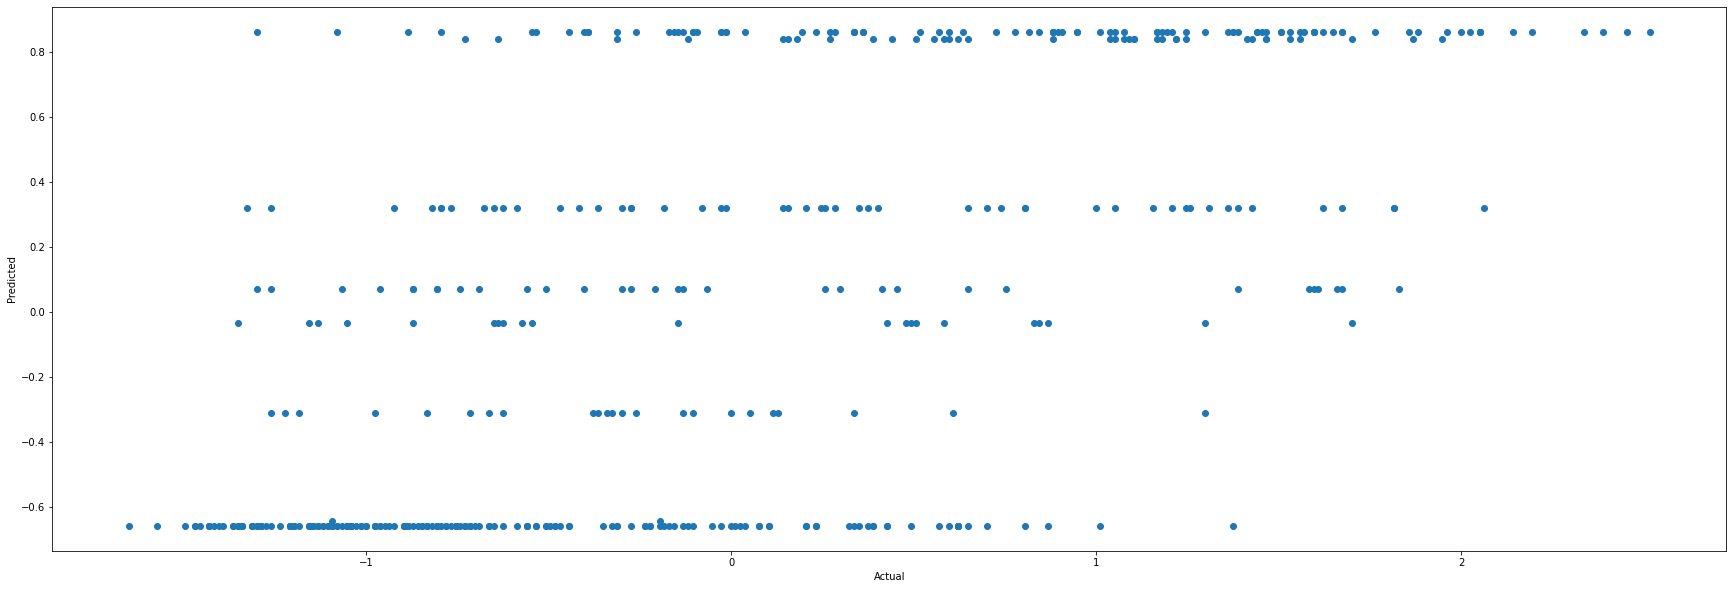

In [20]:
model_tree = GridSearchCV(DecisionTreeRegressor(random_state=520, max_features='sqrt'),
                          cv=5,
                          iid=False,
                          param_grid={
                             "max_depth": list(range(1, 40, 2)),
                             "min_samples_split": list(range(2, 5, 2)),
                          })

scalar = create_scaler_minmax()
model_tree.fit(X, y)
print('The parameters found by CV search:')
print(model_tree.best_params_)
test_score = cross_validate(model_tree, X, y, cv=5, scoring=rmse_score)['test_score']

print('RMSE:', np.mean(test_score))

y_complex_hat = model_tree.predict(X)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(y, y_complex_hat)
plt.show()